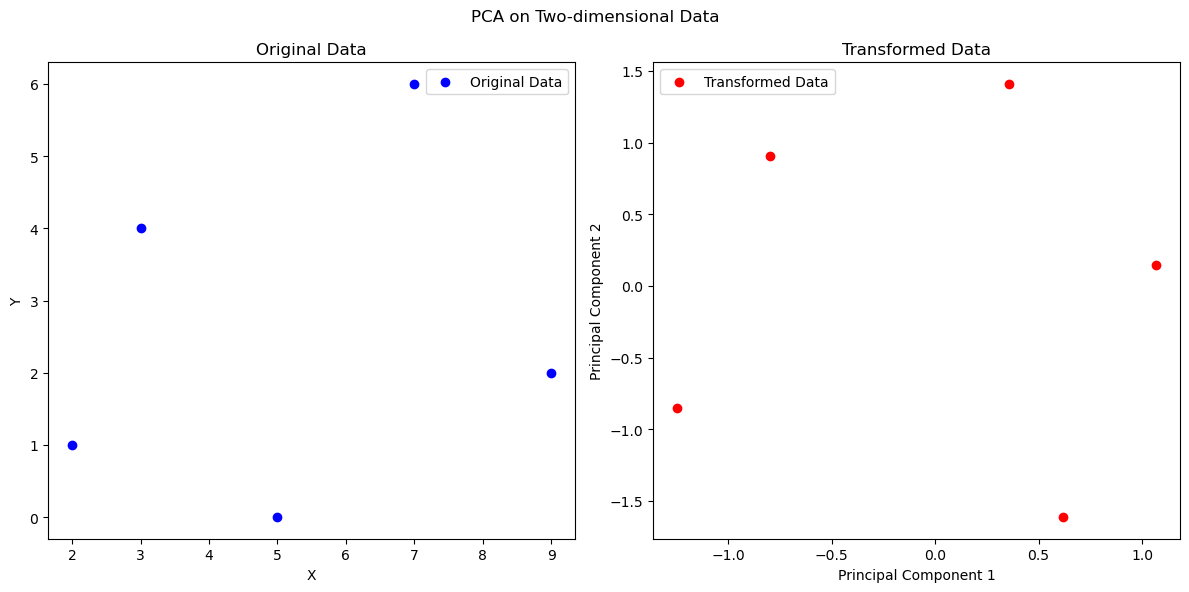

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_data(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    normalized_data = (data - mean) / std_dev
    return normalized_data, mean, std_dev

def calculate_covariance_matrix(data):
    num_samples = data.shape[0]
    covariance_matrix = np.dot(data.T, data) / num_samples
    return covariance_matrix

def compute_eigenvectors(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

def pca(data, num_components):
    normalized_data, mean, std_dev = normalize_data(data)
    
    cov_matrix = calculate_covariance_matrix(normalized_data)
    
    eigenvalues, eigenvectors = compute_eigenvectors(cov_matrix)
    
    top_eigenvectors = eigenvectors[:, :num_components]
    
    transformed_data = np.dot(normalized_data, top_eigenvectors)
    
    return transformed_data, top_eigenvectors, mean, std_dev

def plot_data(original_data, transformed_data, title):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(original_data[:, 0], original_data[:, 1], c='b', label='Original Data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Original Data')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='r', label='Transformed Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Transformed Data')
    plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    
data = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])
transformed_data, _, _, _ = pca(data, 2)
plot_data(data, transformed_data, 'PCA on Two-dimensional Data')


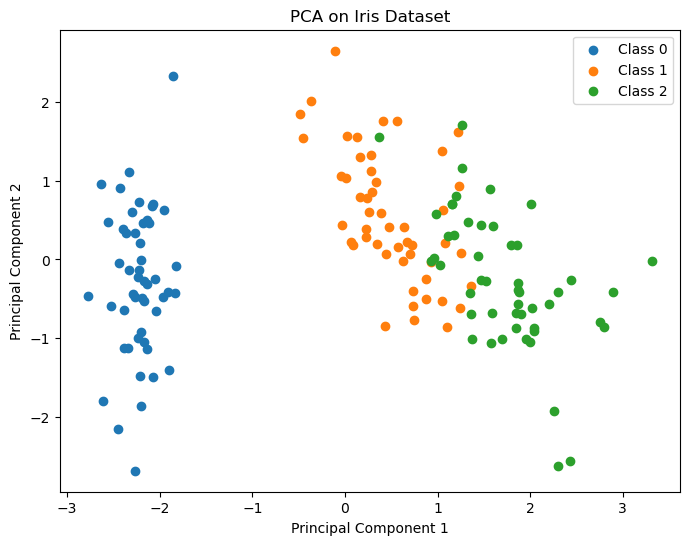

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_data(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    normalized_data = (data - mean) / std_dev
    return normalized_data, mean, std_dev

def calculate_covariance_matrix(data):
    num_samples = data.shape[0]
    covariance_matrix = np.dot(data.T, data) / num_samples
    return covariance_matrix

def compute_eigenvectors(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

def pca(data, num_components):
    normalized_data, mean, std_dev = normalize_data(data)
    
    cov_matrix = calculate_covariance_matrix(normalized_data)
    
    eigenvalues, eigenvectors = compute_eigenvectors(cov_matrix)
    
    top_eigenvectors = eigenvectors[:, :num_components]
    
    transformed_data = np.dot(normalized_data, top_eigenvectors)
    
    return transformed_data, top_eigenvectors, mean, std_dev

def plot_data(original_data, transformed_data, title):
    plt.figure(figsize=(8, 6))
    
    for i in range(3):
        plt.scatter(transformed_data[y == i, 0], transformed_data[y == i, 1], label=f'Class {i}')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.legend()
    plt.show()

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
transformed_X, _, _, _ = pca(X, 2)
plot_data(X, transformed_X, 'PCA on Iris Dataset')
